# Predict Housing Prices

## Goal 
> predict the sales price for each house. For each Id in the test set, you must predict the value of the `SalePrice` 
variable. 

## Metric
- Root-Mean-Squared-Error (RMSE)

## Content
1. [Data imports](#data)
2. [Assessment](#assessment) 
3. [Data Cleaning](#cleaning)
4. [Exploratory Data Analysis](#eda)
5. [Modeling](#model)


Data
- paper to data: https://amstat.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627#.X1ZIXy337UI


# TODO
- transform year built and add to analysis 
- we can drop index

<a id='data'></a>
### 1. Data imports

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# silence settingWithCopyWarning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# read in the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

<a id='assessment'></a>
### 2. Assessment

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [48]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
# check missing values
isnull = train.isnull().sum()
# list of every feature that has missing values and how many
isnull = isnull[isnull != 0]
# create DataFram
frame = {'column': isnull.index, 'missing_values': isnull.values}
missing_vals = pd.DataFrame(frame)
# calculate percentage of missing values
missing_vals['relative'] = missing_vals['missing_values'] * 100 / train.shape[0] 
missing_vals

,column,missing_values,relative
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,8,0.547945
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247
5,BsmtCond,37,2.534247
6,BsmtExposure,38,2.602740
7,BsmtFinType1,37,2.534247
8,BsmtFinType2,38,2.602740
9,Electrical,1,0.068493


#### Check features with more than 50% of missing values

In [35]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

- `Ally` has 94% missing values. A look inside the description shows that the option 'no ally access' in encoded with NA so I will transform those NAs in zeros, to keep this feature.

In [37]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

- `FireplaceQU` has close to 50% missing values. A look inside the description shows that the option 'No fireplace' is encoded with NA, so I will transform those NAs in zeros

In [38]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

- `PoolQC` consists also entirely out of missing values, but as th others it is encoded for the non existing feature 'No Pool'. 

In [39]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

- As the others `Fence` has the option 'No Fence'

In [40]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

- `MiscFeature` stands for miscellaneous features not covered in other category. NAs also are encoded for 'None'

> all of the categorical features use 'NA' as a way to show that a specific feature is not available. So I will use a different code for this, because it is not a missing value

#### Check variable of interest: `SalePrice`

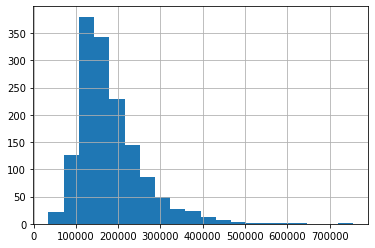

In [3]:
train['SalePrice'].hist(bins=20);

In [46]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
train['SalePrice'].skew()

1.8828757597682129

> the variable of interest is skewed to the right so I will use a log transformation to 'balance' the data

#### Assessment Summary
- `Id` should be a string
- There are some categorical features that have NAs encoded as a lack of a certain feature
    - for `Alley`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature`, `BsmtQual`, `BsmtCond`, `BsmtFinType1`, `BsmtFinType2`
    - `BsmtExposure` has to encodings for a lack of a certain feature
- `MSSubClass` should be an object (categorical feature)
- `MoSold`: transform into string with name of month 
- various categorical features should be encoded as ordered numbers for modeling:
    - `LotShape`, `Utilities`, `LandSlope`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `Functional`, `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`
- `SalePrice` is skewed to the right

<a id='cleaning'></a>
### 3. Data Cleaning

In [22]:
# copy DataFrame
train_c = train.copy()

##### Log transform `SalePrice`

In [23]:
train_c['SalePrice_log'] = np.log(train_c.SalePrice)

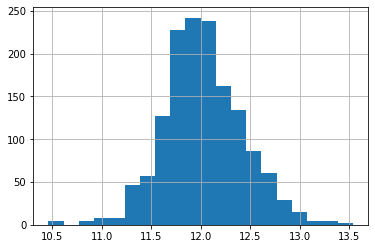

In [8]:
train_c['SalePrice_log'].hist(bins=20);

In [9]:
train_c['SalePrice_log'].skew()

0.12133506220520406

In [10]:
# try to reverse log for final prediction
# https://stackoverflow.com/questions/35893977/how-to-transform-log-differenced-data-fitted-by-statsmodels-var-function-back-t
train_c['SalePrice_log_rev'] = np.exp(train_c.SalePrice_log)

In [12]:
train_c[['SalePrice', 'SalePrice_log', 'SalePrice_log_rev']]

,SalePrice,SalePrice_log,SalePrice_log_rev
0,208500,12.247694,208500.0
1,181500,12.109011,181500.0
2,223500,12.317167,223500.0
3,140000,11.849398,140000.0
4,250000,12.429216,250000.0
...,...,...,...
1455,175000,12.072541,175000.0
1456,210000,12.254863,210000.0
1457,266500,12.493130,266500.0
1458,142125,11.864462,142125.0


> reverse log transformation with np.exp() seems to work

##### replace NAs with zeros for the categorical features

In [7]:
# make list with the specific columns
cols_NA = ['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
           'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']

train_c[cols_NA] = train_c[cols_NA].fillna(0)

##### ID should be a string

In [8]:
train_c['Id'] = train_c['Id'].astype('str')

##### `MSSubClass` should be an object (categorical feature)

In [9]:
train_c['MSSubClass'] = train_c['MSSubClass'].astype('str')

##### `MoSold` transform to string with name of month

In [10]:
# map is faster than repalce according to: https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
MoSold_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
train_c['MoSold'] = train_c['MoSold'].map(MoSold_dict)

#### Function for data cleaning

In [11]:
def clean_data(df, list_NA, MoSold_dict):
    '''
    function to perfrom all the relevant celaning steps
    
    INPUT
        df: pandas DataFrane
        list_NA: list with every column that used NA as an encoding for 'non-existent'
        MoSold_dict: dict with months as values for keys
    
    RETURN
        clean_df: a clean pandas DataFrame ready for modelling
    
    '''
    # log transform price
    df['SalePrice_log'] = np.log(df.SalePrice)
    
    # repalce NAs with 0 
    df[cols_NA] = df[cols_NA].fillna(0)
    
    # transfrom dtypes
    df['Id'] = df['Id'].astype('str')
    df['MSSubClass'] = df['MSSubClass'].astype('str')
    df['MoSold'] = df['MoSold'].map(MoSold_dict)

<a id='eda'></a>
### 4. EDA

In [11]:
# create DataFrame only with numerical features
num_features  = train_c.select_dtypes(exclude='object')
num_features.drop(columns='SalePrice', inplace=True)
num_features.shape

(1460, 35)

In [12]:
# create DataFrame only with categorical features
cat_features = train_c.select_dtypes('object')
cat_features.drop(columns='Id', inplace=True)
cat_features.shape

(1460, 45)

#### Impact of numerical features on `SalePrice`

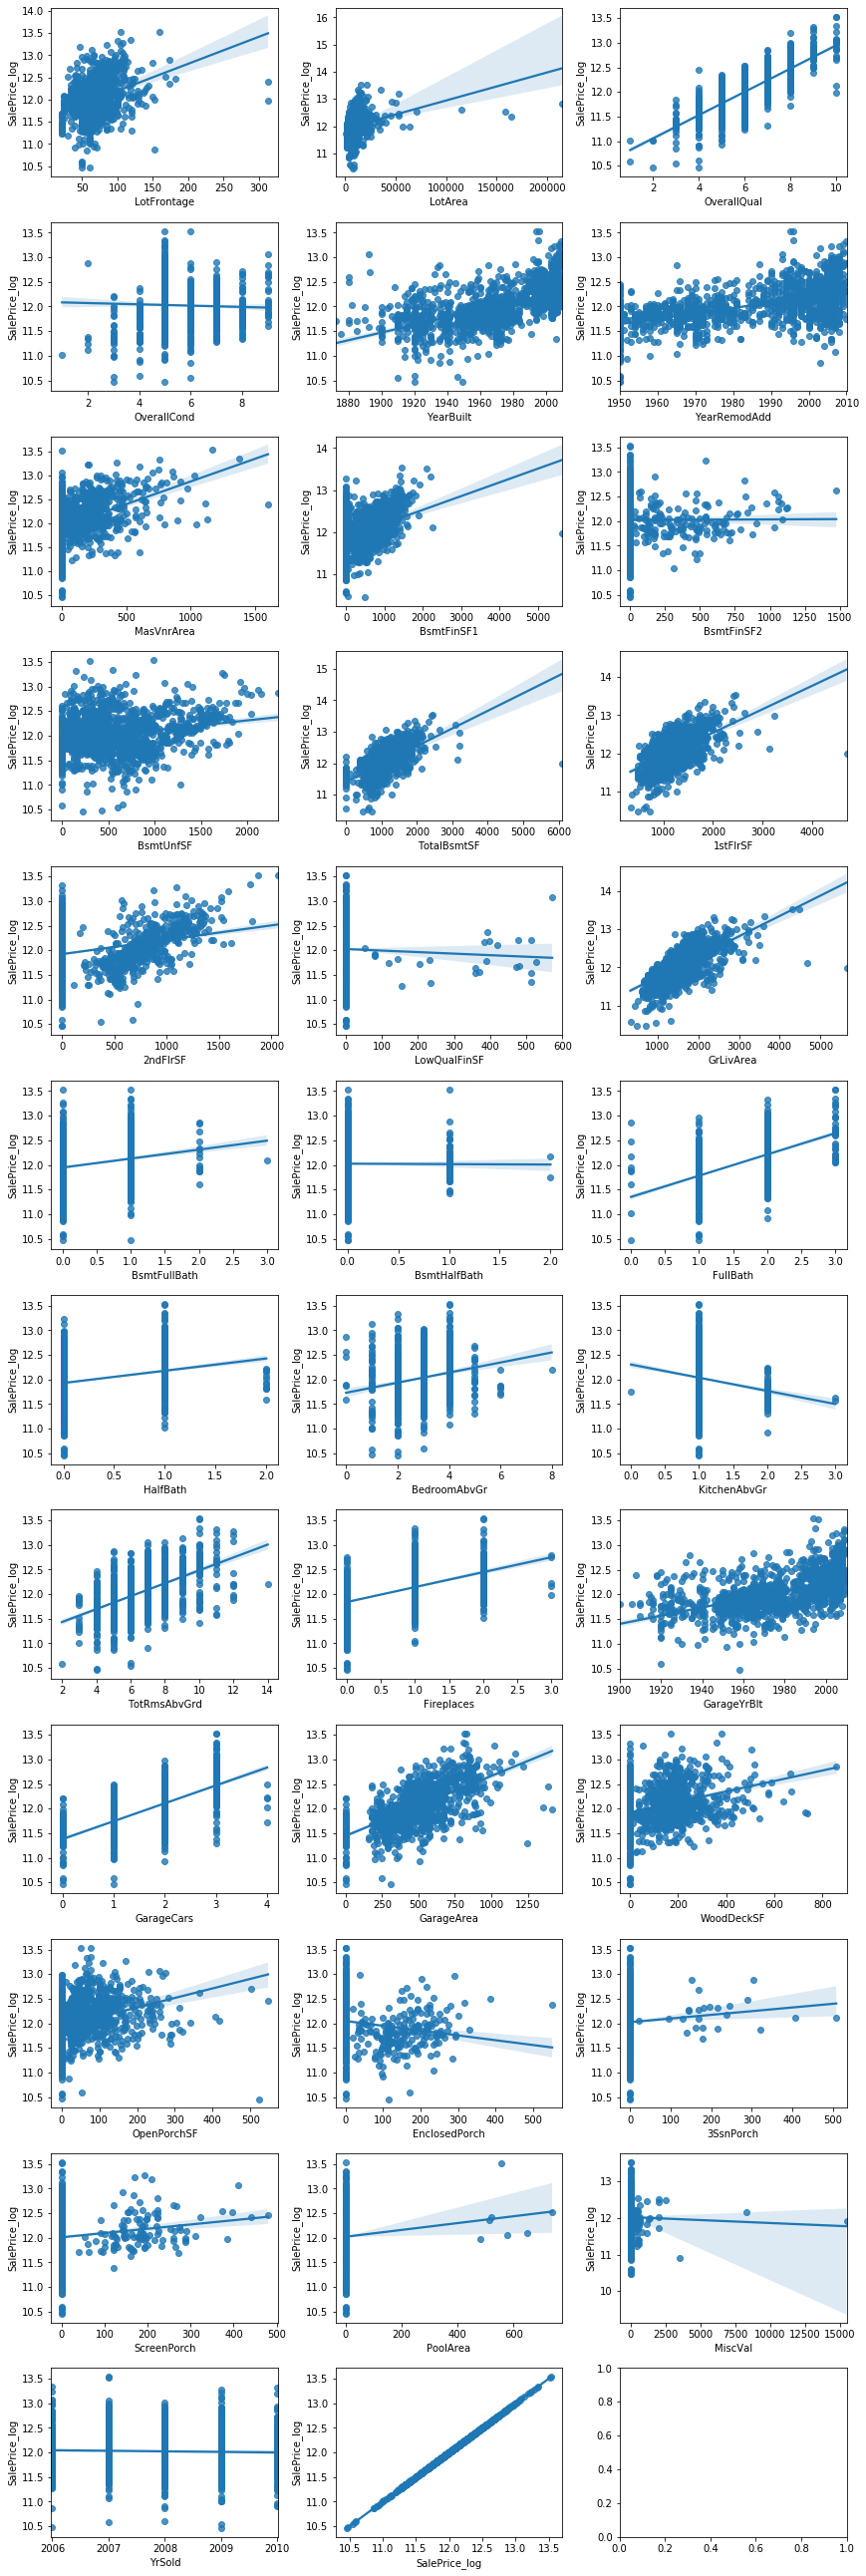

In [71]:
# code from: https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner#Part-0-:-Imports,-Settings,-Functions
# added annotations and changed some things 

# get the column names of the numerical features
li_num_feats = list(num_features)

#define rows and cols
nr_rows = 12
nr_cols = 3 

# init figure
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        # counter to keep track of where we are
        i = r * nr_cols + c
        if i < len(li_num_feats):
            sns.regplot(x=li_num_feats[i], y='SalePrice_log', data=train_c, ax=axs[r][c])

plt.tight_layout()
plt.show()

##### Conclusion for numerical features
- the majority of numerical features correlated with the target
- `OverallQual` seems to be the best indicator for SalePrice, as well as `GrLivArea`
- Features where SalePrice is not linearly dependent:
    - `OverallCond`, `BsmtFinSF2`, `LowQualFinSF`, `BsmtHalfBath`, `MiscVal`, `YrSold`
    - these features should be dropped since they don't provide any prediction value 
- There seems to be some outliers in the data, especially when you look at `LotArea` or `GrLivArea`
- Some features might be highly imbalanced
    - `PoolArea` only 7 individuals have a pool

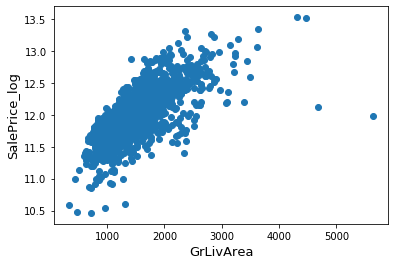

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = train_c['GrLivArea'], y = train_c['SalePrice_log'])
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [26]:
# remove outleirs GRLivArea > 4000 & SlalePrice_log < 12.5
# code from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
train_c = train_c.drop(train_c[(train_c['GrLivArea']>4000) & (train_c['SalePrice_log']<12.5)].index)

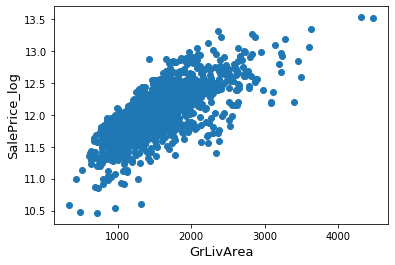

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = train_c['GrLivArea'], y = train_c['SalePrice_log'])
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### Correlation of numerical features with `SalePrice`
> in the previous step I check if the features is linearly connected with the target. Which shows also to an extend the expected correlation. 

In [17]:
corr_matrix = num_features.corr()
corr_matrix = corr_matrix['SalePrice_log'].sort_values(ascending=False)
corr_matrix

SalePrice_log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice_log, dtype: float64

As expected from the plot `OverallQual` and `GrLivArea` are highly positively correlated with SalePrice. The correlation with SalePrice clearly shows that a few features are not at all correlated with SalePrie. Since 0.3 is considered to be a weak correlation, every feature that is lower than 0.3 will be dropped in the modeling phase.

After we looked at the numerical features lets us now plot every categorical feature against the target. 

#### Impact of Categorical features on `SalePrice`

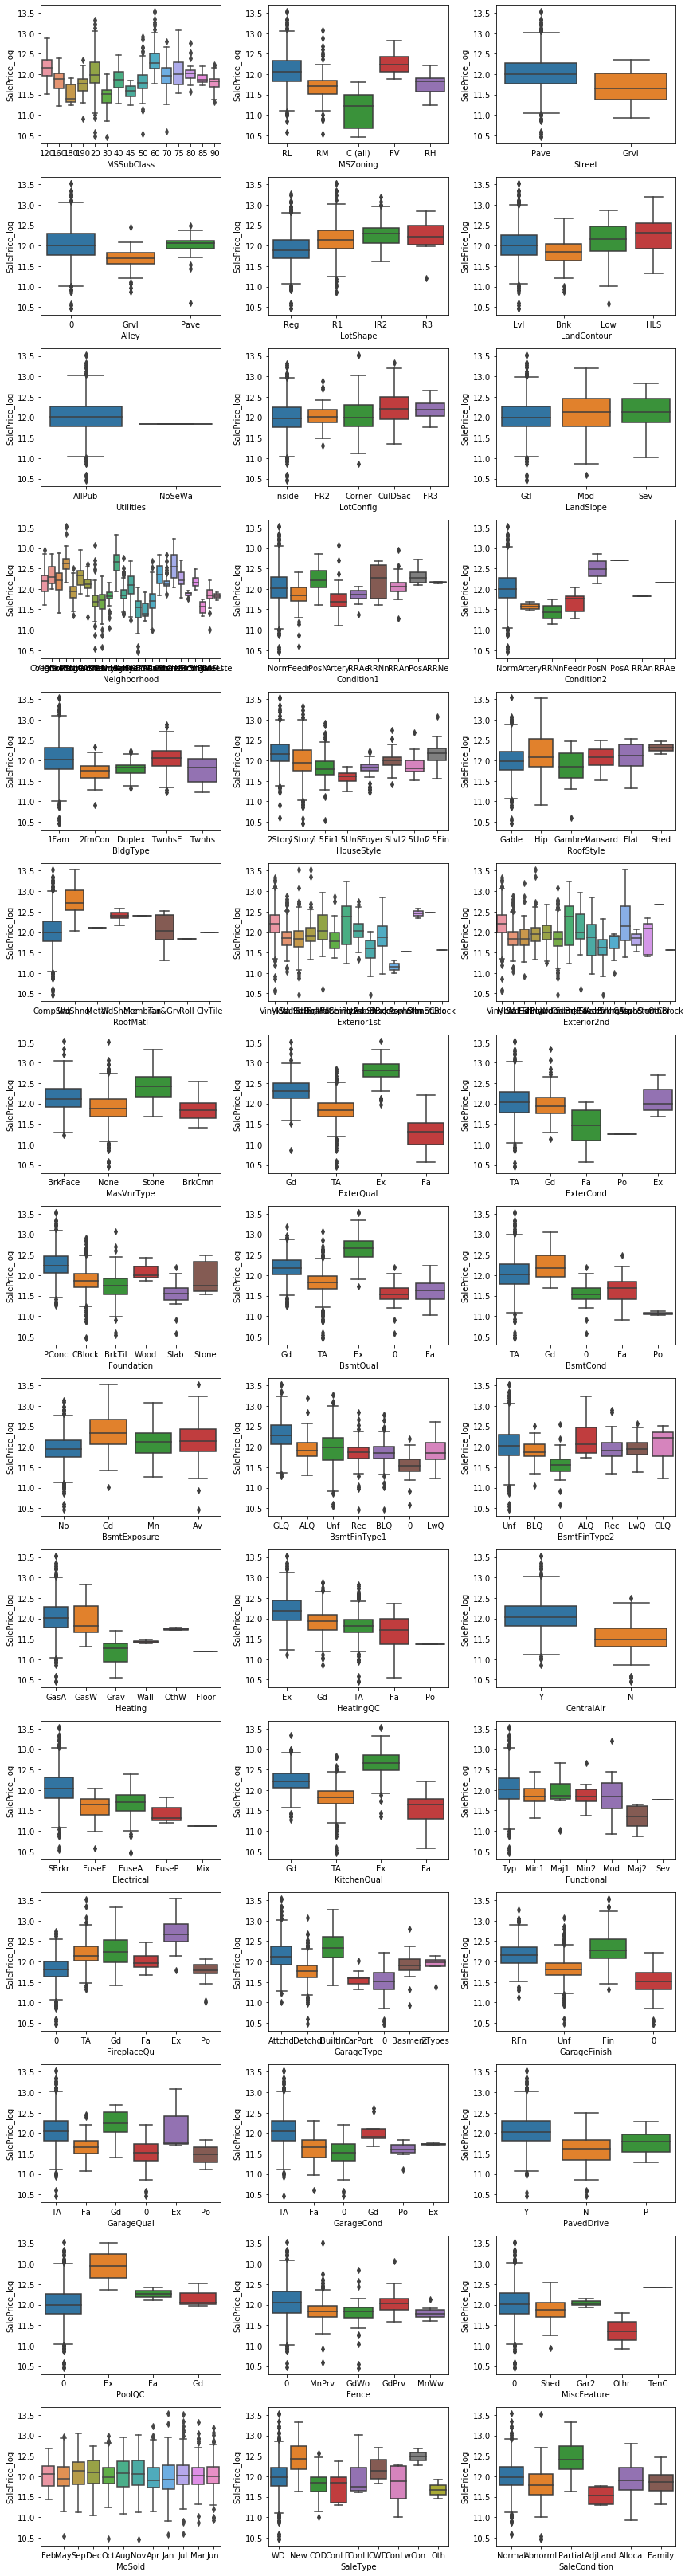

In [72]:
# code from: https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner#Part-0-:-Imports,-Settings,-Functions
# added annotations

# get the column names of the categorical features
li_cat_feats = list(cat_features)
# define rows and cols (45 features)
nr_rows = 15
nr_cols = 3

# init figure
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        # counter to keep trak where we are
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice_log', data=train_c, ax=axs[r][c])

plt.tight_layout()
plt.show()

##### Conclusion for numerical features
- there are a lot of good categorical features that seem to have an strong effect on SalePrice
- `Neighborhood`, `MSZoning`, `ExterQual`, etc. seems to be the categorical feature with the most variance on SalePrice
- There are also features where the impact isn't as strong as the ones listed, these should be dropped, since they don't provide any real predictive value:
    - `MoSold`, `Fence`, `PavedDrive`, `BsmtFinType1`, `BsmtFinType2`, `Utilities`, `LandSlope`, `LotConfig`, `PoolQC`, `RoofStyle`
- `BsmtExposure` we could combine the options because thy don't differ too much but all are higher than 'No Exposure' (transform to binary)
   
   
- this was just based on a visual inspection, one could perform an ANOVA to see the impact of each categorical feature on SalePrice

In [27]:
# final cat variables:
final_cat_feats = ['Neighborhood', 'MSZoning', 'MSSubClass', 'HouseStyle']

for cat in final_cat_feats:
    print(train_c.groupby(by=cat)['SalePrice_log'].mean())
    print('#'*30)

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.712312
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: SalePrice_log, dtype: float64
##############################
MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePrice_log, dtype: float64
##############################
MSSubClass
120    12.171554
160    11.807190
180    11.501750
190    11.734853
20     12.052788
30     11.433809
40     11.870422
45     11.579033
50     11.814537
60     12.339975
70     11.964045
75     12.064780

In [28]:
final_ord_feats = ['ExterQual', 'KitchenQual']

for ord_ in final_ord_feats:
    print(train_c.groupby(by=ord_)['SalePrice_log'].mean())
    print('#'*30)

ExterQual
Ex    12.764044
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_log, dtype: float64
##############################
KitchenQual
Ex    12.633614
Fa    11.504581
Gd    12.222337
TA    11.810592
Name: SalePrice_log, dtype: float64
##############################


In [ ]:
# look at year sold -> in the range between 2006 and 2010 (short period no need for accounting inflation)

<a id='model'></a>
### 5. Modeling
- create a variable that indicates if a pool is present 
- drop num features with a correlation below 0.3
- drop cat features that don't have disparity on SalePrice
- transform `BsmtExposure` to binary
- some categorical features have a natural ordered relationship which can be used 


>#### future feature engineering
>- make a binary variable for pool (drop PoolArea from num and PoolQC from cat)

In [13]:
train_c['PoolArea'] = np.where((train_c.PoolArea != 0), 1, train_c.PoolArea)

In [14]:
train_c.groupby('PoolArea')['SalePrice_log'].mean()

PoolArea
0    12.022115
1    12.425816
Name: SalePrice_log, dtype: float64

In [15]:
train_c.drop(columns='PoolQC', inplace=True)

In [18]:
# drop num features with corrleation below 0.3
num_feats_drop = corr_matrix[corr_matrix < 0.3].index
train_c.drop(columns=num_feats_drop, inplace=True)

In [19]:
# drop cat features
cat_feats_drop = ['MoSold', 'Fence', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 'Utilities', 'LandSlope', 'LotConfig', 'RoofStyle']
train_c.drop(columns=cat_feats_drop, inplace=True)

In [20]:
train_c['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [21]:
train_c['BsmtExposure'].fillna(0, inplace=True)

In [22]:
train_c.groupby('BsmtExposure')['SalePrice'].mean()

BsmtExposure
0     107938.342105
Av    206643.420814
Gd    257689.805970
Mn    192789.657895
No    165652.295908
Name: SalePrice, dtype: float64

#### create a numeric label for the ordinal features

In [29]:
ord_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

for ord_ in final_ord_feats:
    train_c[ord_] = train_c[ord_].map(ord_dict)

#### create dummy variables for categorical features

In [33]:
dummies = pd.get_dummies(train_c[final_cat_feats], drop_first=True)

#### Handle missing values

In [55]:
isnull = train_c.isnull().sum()
isnull[isnull >0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [59]:
# impute the mean for LotFrontage
train_c['LotFrontage'].fillna(train_c['LotFrontage'].mean(), inplace=True)

In [60]:
train_c['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

### Basis Model

In [42]:
# create final DataFrame
model = train_c.select_dtypes(exclude='object')
model = model.join(dummies)

In [45]:
model.drop(columns='SalePrice', inplace=True)

#### Check and handle missing values

In [61]:
isnull_model = model.isnull().sum()
isnull_model[isnull_model >0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [62]:
# impute the mean for LotFrontage
model['LotFrontage'].fillna(model['LotFrontage'].mean(), inplace=True)

In [70]:
# impute the mode (0), since the most houses don't have Masonry veneer
model['MasVnrArea'].fillna(0.0, inplace=True)

In [77]:
# impute the median for Year garage was built
model['GarageYrBlt'].fillna(model['GarageYrBlt'].median(), inplace=True)

In [78]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1460 non-null   float64
 1   OverallQual           1460 non-null   int64  
 2   YearBuilt             1460 non-null   int64  
 3   YearRemodAdd          1460 non-null   int64  
 4   MasVnrArea            1460 non-null   float64
 5   ExterQual             1460 non-null   int64  
 6   BsmtFinSF1            1460 non-null   int64  
 7   TotalBsmtSF           1460 non-null   int64  
 8   1stFlrSF              1460 non-null   int64  
 9   2ndFlrSF              1460 non-null   int64  
 10  GrLivArea             1460 non-null   int64  
 11  FullBath              1460 non-null   int64  
 12  HalfBath              1460 non-null   int64  
 13  KitchenQual           1460 non-null   int64  
 14  TotRmsAbvGrd          1460 non-null   int64  
 15  Fireplaces           

In [80]:
def clean_prerocess_model(df, list_NA, cat_feats_drop,final_num_cols, final_cat_cols):
    '''
    function to perfrom all the relevant celaning steps
    
    INPUT
        df: pandas DataFrane
        list_NA: list with every column that used NA as an encoding for 'non-existent'
        
    
    RETURN
        clean_df: a clean pandas DataFrame ready for modelling
    
    '''
    # log transform price
    df['SalePrice_log'] = np.log(df.SalePrice)
    df.drop(columns='SalePrice', inplace=True)
    
    # repalce NAs with 0 
    df[cols_NA] = df[cols_NA].fillna(0)
    
    # transfrom dtypes
    df['Id'] = df['Id'].astype('str')
    df['MSSubClass'] = df['MSSubClass'].astype('str')
    MoSold_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    df['MoSold'] = df['MoSold'].map(MoSold_dict)

    # Feature engineering
    df['PoolArea'] = np.where((df.PoolArea != 0), 1, df.PoolArea)
    df.rename(columns={'PoolArea': 'Pool'})


    df.drop(columns=cat_feats_drop, inplace=True)


    ord_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

    for ord_ in final_ord_feats:
        df[ord_] = df[ord_].map(ord_dict)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

## Useful links:
- Feature Selection with “BorutaShap”: https://medium.com/analytics-vidhya/is-this-the-best-feature-selection-algorithm-borutashap-8bc238aa1677
- Stacking Ensemble Machine Learning: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
- Prediction using Weighted Average Ensemble: https://medium.com/analytics-vidhya/used-car-prediction-using-weighted-average-ensemble-74039a2761d6

In [1]:
# I can use OrdinalEncoder to transform categrical features into ordinal ones 


fields that need to be in order:
ord_fields=['MSSubClass','ExterQual','LotShape','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','Functional','FireplaceQu',
            'KitchenQual', 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
their orders:
orders=[ #msclass ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'], #ExterQual ['Fa','TA','Gd','Ex'], 
    #LotShape ['Reg','IR1' ,'IR2','IR3'], #BsmtQual ['None','Fa','TA','Gd','Ex'], #BsmtCond ['None','Po','Fa','TA','Gd','Ex'], 
    #BsmtExposure ['None','No','Mn','Av','Gd'], #BsmtFinType1 ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    #BsmtFinType2 ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], #HeatingQC ['Po','Fa','TA','Gd','Ex'], 
    #Functional ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], #FireplaceQu ['None','Po','Fa','TA','Gd','Ex'], 
    #KitchenQual ['Fa','TA','Gd','Ex'], #GarageFinish ['None','Unf','RFn','Fin'], #GarageQual ['None','Po','Fa','TA','Gd','Ex'], 
    #GarageCond ['None','Po','Fa','TA','Gd','Ex'], #PoolQC ['None','Fa','Gd','Ex'], #Fence ['None','MnWw','GdWo','MnPrv','GdPrv'] ] 
and then :
for i in range(len(orders)): 
    ord_en=OrdinalEncoder(categories = {0:orders[i]}) 
    all_data.loc[:,ord_fields[i]]=ord_en.fit_transform(all_data.loc[:,ord_fields[i]].values.reshape(-1,1))

SyntaxError: invalid syntax (<ipython-input-1-a778f6f51879>, line 4)

In [ ]:
# encode cat features with one dict and use map
# https://www.kaggle.com/fedi1996/house-prices-data-cleaning-viz-and-modeling


bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)